# 와인 추천 알고리즘

### 1. 데이터 크롤링

In [19]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt

In [ ]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

class GetText(object):
    def __init__(self, ulist, start, end):                  
        self.ulist = ulist
        self.start = start
        self.end = end

    def wine_info(self):                        
        wine_dict = OrderedDict()              
        wine_dict['id'] = []
        wine_dict['name'] = []
        wine_dict['production1'] = []
        wine_dict['production2'] = []
        wine_dict['production3'] = []
        wine_dict['production4'] = []
        wine_dict['type'] = []
        wine_dict['alc'] = []
        wine_dict['producer'] = []
        wine_dict['varieties'] = []
        wine_dict['bestfor'] = []
        wine_dict['sweetness'] = []
        wine_dict['body'] = []
        wine_dict['tastingnote'] = []

        for i in range(self.start, self.end):                 
            url = self.ulist.iloc[i]['URL']         
            res = requests.get(url)
            soup = BeautifulSoup(res.content)

            idnum = re.search(r'\d{5}', url).group()    
            wine_dict['id'].append(idnum)

            try:
                li0 = soup.find('li', attrs = {'class' : 'WineEndName'})  
                wine_name = li0.get_text()
                subwine_name = re.sub(r'\s',' ', wine_name)
                wine_dict['name'].append(subwine_name)
            except:
                wine_dict['name'].append('None')
            
            try:
                li1 = soup.find('li', attrs = {'class' : 'WineProduction'})
                a = li1.find_all('a')
                for i in range(4):
                    if i <= len(a) -1 :
                        wine_dict['production{}'.format(i+1)].append(a[i].get_text())
                    else :
                        wine_dict['production{}'.format(i+1)].append('None')
            except:
                wine_dict['production1'].append('None')
                wine_dict['production2'].append('None')
                wine_dict['production3'].append('None')
                wine_dict['production4'].append('None')
            
            try:
                li1_1 = soup.find('li', attrs = {'class' : 'WineInfo'})
                words = li1_1.get_text().strip()
                wine_dict['type'].append(re.search(r'^\w+', words).group())
            except:
                wine_dict['type'].append('None')
            
            try:
                li = soup.find('li', attrs = {'class' : 'WineInfo'})
                aic = re.search(r'AIC[.\d]+', li.get_text().strip())
                if not aic :
                    wine_dict['alc'].append('None')
                else :
                    wine_dict['alc'].append(aic.group())
            except:
                wine_dict['alc'].append('None')
                
            try:
                li2 = soup.find('li', attrs = {'class' : 'Winery'}) 
                producer = li2.a.get_text()
                reproducer = re.sub(r'\s', ' ', producer)
                wine_dict['producer'].append(reproducer)
            except:
                wine_dict['producer'].append('None')                

            try:
                li3 = soup.find('li', attrs = {'class' : 'Varieties'})
                varieties = ''
                for var in li3.find_all('a') :
                    varieties += var.get_text()
                wine_dict['varieties'].append(varieties)
            except:
                wine_dict['varieties'].append('None')

            try:
                li4 = soup.find('li', attrs = {'class' : 'BestFor'})
                bestfor = li4.get_text()
                wine_dict['bestfor'].append(bestfor.strip())
            except:
                wine_dict['bestfor'].append('None')

            
            try :
                li6 = soup.find('li', attrs = {'class' : 'Sweetness'})
                px = li6.find_all('img')[1]['style']
                wine_dict['sweetness'].append(re.search(r'\d+', px).group())
            except :
                wine_dict['sweetness'].append('None')

            try :
                li7 = soup.find('li', attrs = {'class' : 'Body'})
                px = li7.find_all('img')[1]['style']
                wine_dict['body'].append(re.search(r'\d+', px).group())
            except :
                wine_dict['body'].append('None')
            
            try:
                ul = soup.find('ul', attrs = {'class' : 'TastingnoteList'}) 
                note = ul.get_text().strip()
                subnote = re.sub(r'\s', ' ', note)            
                wine_dict['tastingnote'].append(subnote)       
            except:                                            
                wine_dict['tastingnote'].append('None')
            
        wine_df = pd.DataFrame(wine_dict)       

        return wine_df

df = pd.read_csv('pd_url_list_short.csv')      
    
i=0
while i<17685:    
    wine2 = GetText(df,i,i+1000)            
    result = wine2.wine_info()       
    try:
        writer = pd.ExcelWriter('./wine{}_{}.xlsx'.format(i,i+685), engine=None)
        result.to_excel(writer, sheet_name='1', encoding ='utf-8')      
        writer.save()
        i += 1000
    except:
        i += 1000
        continue        

크롤링이 부족한 부분

### 2. 부족한 부분 추가로 크롤링

In [ ]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

df = pd.read_csv('pd_url_list_short.csv')       #df 변수로 csv 파일을 읽어옵니다.

class GetText(object):
    def __init__(self, ulist, start, end):                  #나중에 ulist 부분에는 앞에서 정의한 df를 넣어줍니다.
        self.ulist = ulist
        self.start = start
        self.end = end

    def wine_info(self):                        #wine_dict는 id, name, production 등등을 key로 갖는 사전.
        wine_dict = OrderedDict()               # 각각의 key는 리스트를 value로 갖습니다.
        wine_dict['id'] = []
        wine_dict['varieties'] = []
        wine_dict['tastingnote0'] = []
        wine_dict['tastingnote1'] = []
        wine_dict['price'] = []

        for i in range(self.start, self.end): 
            url = self.ulist.iloc[i]['URL'] 
            
            try:
                res = requests.get(url)
                soup = BeautifulSoup(res.content)
            except:
                wine_dict['id'].append('None')
                wine_dict['varieties'].append('None')
                wine_dict['tastingnote0'].append('None')
                wine_dict['tastingnote1'].append('None')
                wine_dict['price'].append('None')
                continue

            idnum = re.search(r'\d{5}', url).group()    
            wine_dict['id'].append(idnum)

            try:
                li3 = soup.find('li', attrs = {'class' : 'Varieties'})
                varieties = ''
                for var in li3.find_all('a') :
                    varieties += var.get_text() + ','
                wine_dict['varieties'].append(varieties)
            except:
                wine_dict['varieties'].append('None')
            
            try:
                li = soup.find('li', {'class' : 'Price'})
                prices = li.find_all('div')[1].get_text()
                reprices = re.search(r'[-.,~\b\d]+', prices).group()
                wine_dict['price'].append(reprices)
            except:
                wine_dict['price'].append('None')
            
            try:
                div = soup.find('div', attrs = {'id' : 'TastingnoteCont'}) 
                note = div.find_all('li', attrs = {'class' : 'TastingnoteContent'})
                
                if len(note) == 2:
                    note0= note[0].get_text().strip()
                    subnote0= re.sub(r'\s', ' ', note0)       
                    wine_dict['tastingnote0'].append(subnote0)

                    note1= note[1].get_text().strip()
                    subnote1 = re.sub(r'\s', ' ', note1)
                    wine_dict['tastingnote1'].append(subnote1)
                
                elif len(note) == 1:
                    wine_dict['tastingnote0'].append('None')
                    
                    note1= note[1].get_text().strip()
                    subnote1 = re.sub(r'\s', ' ', note1)
                    wine_dict['tastingnote1'].append(subnote1)

            except:                                            
                wine_dict['tastingnote0'].append('None')
                wine_dict['tastingnote1'].append('None')
            
        wine_df = pd.DataFrame(wine_dict) 

        return wine_df  

starts = 0
ends = 1000
clk = 1000
limit = 17000
while starts < limit:    
    wine2 = GetText(df,starts,ends) 
    result = wine2.wine_info()       
    try:
        writer = pd.ExcelWriter('./wines{}_{}.xlsx'.format(starts,ends), engine=None)
        result.to_excel(writer, sheet_name='1', encoding ='utf-8') 
        writer.save()
        starts += clk
        ends += clk
    except:
        starts += clk
        ends += clk
        continue

+ 데이터 샘플

In [5]:
crawling_raw = pd.read_csv('./report/crawling_raw.csv').ix[:,1:]
crawling_raw.head(2)

,id,name,production1,production2,production3,production4,type,alc,winery,varieties,bestfor,sweetness,body,tastingnote0,tastingnote1,price
0,38671,Chateau Pontet Canet 2007,France,Bordeaux,Pauillac,None,Red,AIC.12.5,Chateau Pontet Canet (샤또 뽕떼 까네),"Cabernet Sauvignon 60%,Merlot 33%,Cabernet Fra...",Table Wine,261,None,"그릴에 구운 소고기, 닭고기등 각종 그릴요리와 바베큐 요리와 잘 어울린다.",서양자두와 베리의 향에 약간의 허브향과 더불어 매우 근사한 느낌을 주는 와인이다. ...,"250,000"
1,43271,"Ata Rangi, Pinot Noir 2006",New Zealand,South Island,Marlborough,None,Red,None,Ata Rangi (아타 랑기),"Pinot Noir 100%,",Table Wine,261,146,"각종 육류요리, 치즈 등과 잘 어울린다.",none,"180,000"


### 3. Feature selection
+ production1, type, varieties, sweetness, body, tastingnote1 선택

In [7]:
crawling_raw = pd.read_csv('./report/crawling_raw.csv').ix[:,['id', 'production1', 'type', 'varieties', 'sweetness', 'body', 'tastingnote1']]
crawling_raw.head(1)

,id,production1,type,varieties,sweetness,body,tastingnote1
0,38671,France,Red,"Cabernet Sauvignon 60%,Merlot 33%,Cabernet Fra...",261,None,서양자두와 베리의 향에 약간의 허브향과 더불어 매우 근사한 느낌을 주는 와인이다. ...


### 4. Encoding
+ production1 -> 구대륙(유럽), 신대륙(유럽 외) 구분
+ type -> red, rose, champagne, white로 구분, 1~4로 인코딩
+ sweetness, body -> 1~5 단계로 인코딩
+ varieties, tastingnote -> Bag of Words 방식 응용

### 4-1 : tasting note encoding

In [ ]:
#Countvecterizer로 분리
source = pd.read_csv('t_note.csv', encoding='cp949')

#print source.head()
record1 = source['tastingnote1']
record2 = source['tastingnote0']

vec = CountVectorizer(encoding='utf-8')
TF = vec.fit_transform(record2)

# TF에 담긴 feature들을 저장한다.
feature = vec.get_feature_names()

# 문장수, feature수
temp1 = TF.data
temp2 =TF.indices
temp3 =TF.indptr

# feature_names 저장 
df= pd.DataFrame(feature)

writer = pd.ExcelWriter('feature2.xlsx', engine=None)
df.to_excel(writer, sheet_name='2', encoding ='utf-8')
writer.save()

# feature 별 카운트 수
dic={'name_index':temp2,'data':temp1}
df1= pd.DataFrame(dic)

writer = pd.ExcelWriter('testingnote2.xlsx', engine=None)
df1.to_excel(writer, sheet_name='1', encoding ='utf-8')
writer.save()

In [ ]:
tastingnote = pd.read_csv('./report/tastingnote.csv')
tastingnote.columns = ['id', 'note']
tastingnote_categories = pd.read_csv('./report/categories.csv')
df_encoding = pd.DataFrame(categories.columns)

for k in range(10):
    encoding = np.zeros(17)                    #각 와인별
    for j in range(17):                       #각 카테고리별
        for i in tastingnote_categories.ix[:,j]:          #카테고리의 향기별
            try:
                if str(i) in tastingnote.ix[k,1]:       
                    encoding[j] += 1
            except:
                encoding[j] = 'error'
                
    df_encoding[tastingnote.ix[k,0]] = encoding
df_encoding.to_csv('tastingnote_encoded.csv')

### 4-2 : varieties encoding

In [13]:
varieties = pd.read_csv('varieties.csv')
varieties.columns = ['id', 'varieties']

varieties_categories = pd.read_csv('varieties_categories.csv')
df_encoding = pd.DataFrame(varieties_categories.columns)

for k in range(len(varieties)):
    encoding = np.zeros(20)                    #각 와인별
    for j in range(20):                    #각 카테고리별
        for i in varieties_categories.ix[:,j]:
            if str(i) in varieties.ix[k,1]:
                encoding[j] += 1
    df_encoding[varieties.ix[k,0]] = encd
df_encoding.T.to_csv('varieties_encoded.csv')

In [16]:
df_encoded = pd.read_csv('./report/encoded.csv')
df_encoded.tail(2)

,id,new_old,type,sweet,body,fruits,nuts,flowers,snacks,trees,...,Tempranillo,Malbec,Carmenere,Riesling,Nebbiolo,Mourvedre,Moscato,Semillon,Viognier,1/n
10344,61673,0,1,5,5,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
10345,61674,0,1,5,5,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0


### 5. 거리 기반 분석

In [ ]:
df = pd.read_csv('./report/encoded_weight.csv')
df_text = pd.read_csv('./report/text_info.csv')

def get_distance(df, *args):
    data_pool = np.array(df.ix[:,1:])
    df_form = pd.DataFrame(columns=['input', 'id', 'euclead', 'cosine'])
    for i in args:
        x_new = np.array(df.ix[df['id']==i])[0][1:]

        distance = np.linalg.norm(data_pool - x_new, axis=1)
        distance = distance[:,np.newaxis]
        cosine = cosine_similarity(data_pool, x_new)

        df_distance = pd.concat([df['id'], pd.DataFrame(distance, columns=['euclead']), pd.DataFrame(cosine, columns=['cosine'])], axis=1)
        df_distance.sort_values(by='cosine', ascending=False, inplace =True)
        df_distance.sort_values(by='euclead', inplace = True)
        df_distance = df_distance[1:6]
        df_distance.reset_index(drop = True, inplace = True)

        df_id = pd.DataFrame(np.array([[i]]*5), columns = ['input'])

        df_result = pd.concat([df_id, df_distance], axis=1)
        df_form = pd.concat([df_form, df_result], axis=0)
        
    return df_form

wines = get_distance(df, 55930, 38879, 41387, 53536, 45112)

### 6. 시각화

In [17]:
df = pd.read_csv('./report/encoded.csv')

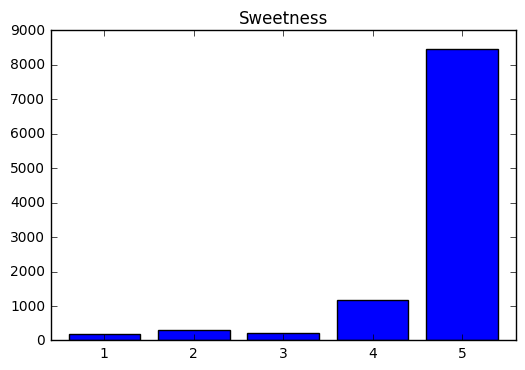

In [29]:
#당도
sweet = np.array(df['sweet'], dtype='int32')

x = [1,2,3,4,5]
y = np.bincount(sweet)[1:]

plt.bar(x,y, align='center')
plt.xticks([1,2,3,4,5])
plt.xlim(0.4, 5.6)
plt.title('Sweetness')
plt.show()

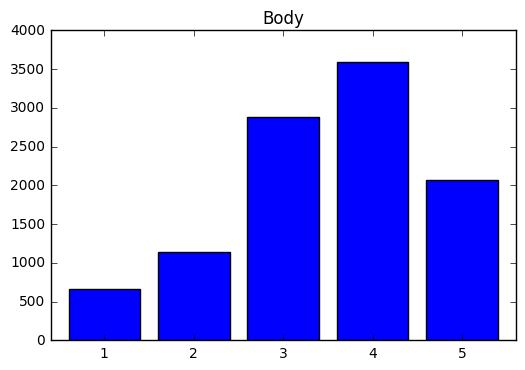

In [30]:
#바디감
body = np.array(df['body'], dtype='int32')

x = [1,2,3,4,5]
y = np.bincount(body)[1:]

plt.bar(x,y, align='center')
plt.xticks([1,2,3,4,5])
plt.xlim(0.4, 5.6)
plt.title('Body')
plt.show()

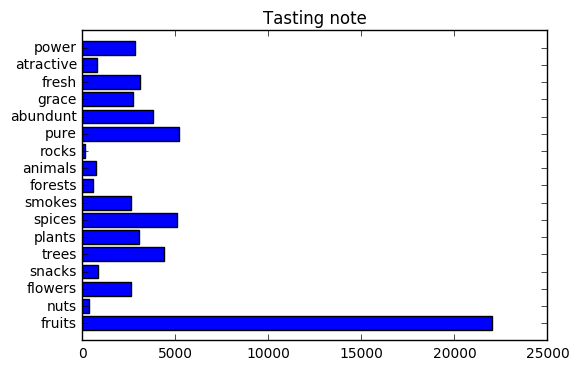

In [33]:
#테이스팅 노트
x =df.columns[5:22]
y = df[x].sum(axis=0).values

plt.barh(np.arange(1,18), y, align = 'center')
plt.yticks(np.arange(1,18), np.array(x))
plt.title('Tasting note')
plt.show()

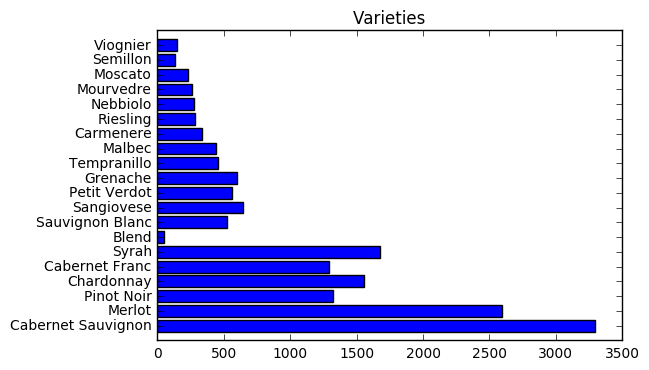

In [32]:
#포도품종
x = df.columns[22:-1]
y = df[x].sum(axis=0).values

plt.barh(np.arange(1,21), y, align = 'center')
plt.yticks(np.arange(1,21), np.array(x))
plt.ylim(0,21)
plt.title('Varieties')
plt.show()

## 7. 검증

- User 기반이 아닌 상품기반이기 때문에 검증하는데 어려움이 있었음
- 소물리에(김경문씨 세계에서 100명뿐인 와인자격증 보유)의 도움을 받아 검증을 시작함

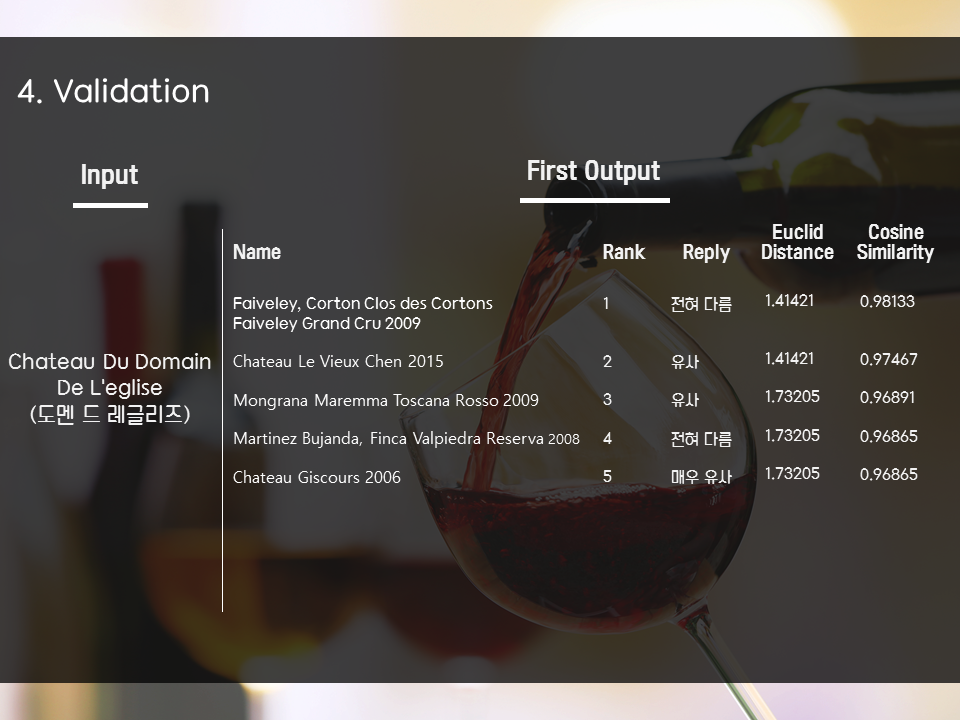

In [3]:
from IPython.display import Image
Image(filename='validation1.png')

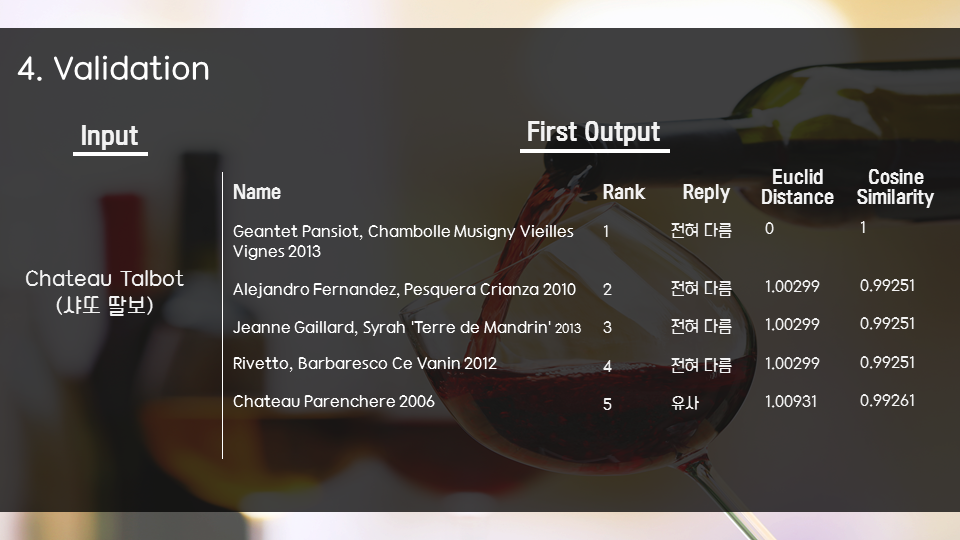

In [5]:
Image(filename='validation2.png')

- 처음 모델링 한것을 기반으로 설문을 보내보았지만 돌아온 대답이 다르다는 것이 많았음
- 그래서 포도품종을 추가한 모델링을 하기로 결정

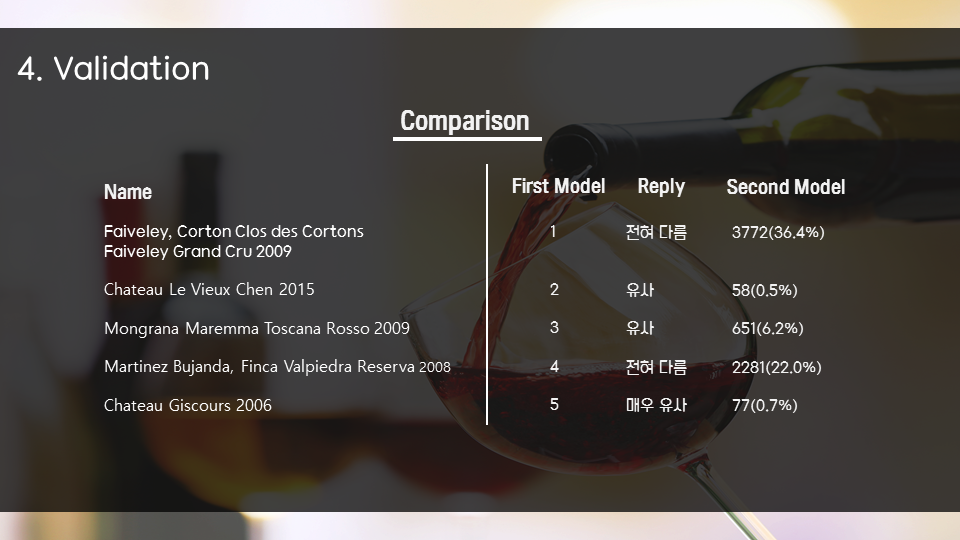

In [6]:
Image(filename='validation3.png')

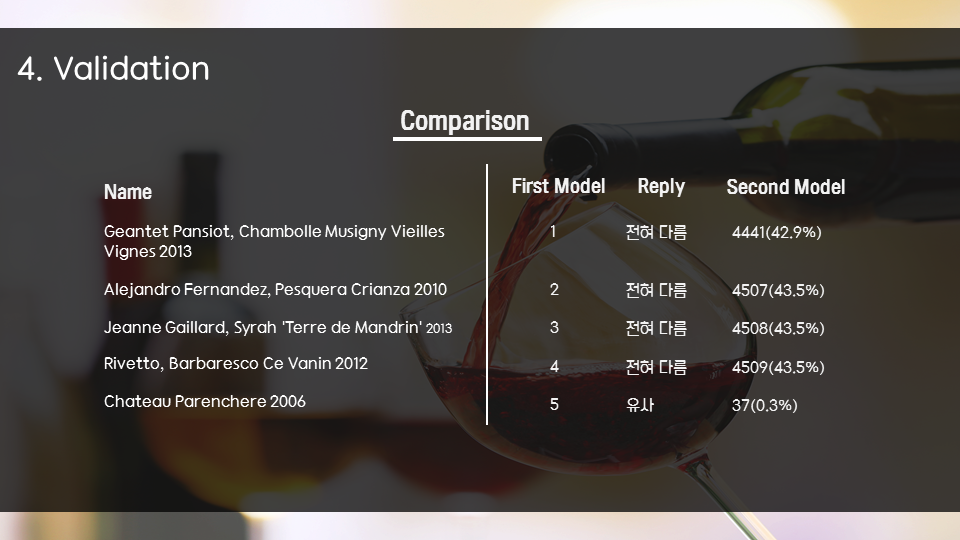

In [7]:
Image(filename='validation4.png')

- 포도품종을 추가한 이후 전혀 다르다고 답변온 와인의 등수가 급격하게 하락하였다.